In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/flagellar/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
importlib.reload(fls);
fls.profiling=False

MainProcess
MainProcess


In [2]:
files = glob.glob(fls.result_dir + '/many_abbr_full/Baseline_0M*')
models = [fls.dill_load(f) for f in files]
models = sorted(models, key=lambda d:d.trained_model.seed)

In [3]:
models[0].modifier_values

{'seed': 0,
 'n_ensemble': 1,
 'scale_approach': 1,
 'scale_percentile_value': 3.0,
 'moving_ratio': 0.2,
 'scale_std_clip_value': 2.0,
 'blur_z': 1,
 'img_size': 640,
 'n_epochs': 50,
 'lr0': 0.001,
 'use_best_epoch': False,
 'model_name': 'yolov9s',
 'use_pretrained_weights': True,
 'box_size': 24,
 'trust': 4,
 'multi_scale_training': False,
 'fix_norm_bug': True,
 'weight_decay': 0.0005,
 'hsv_h': 0.015,
 'hsv_s': 0.7,
 'hsv_v': 0.4,
 'translate': 0.1,
 'scale': 0.5,
 'fliplr': 0.5,
 'flipud': 0.0,
 'degrees': 0.0,
 'shear': 0.0,
 'mosaic': 1.0,
 'mixup': 0.2,
 'erasing': 0.4,
 'use_albumentations': False,
 'include_multi_motor': True,
 'alternative_slice_selection': True,
 'negative_slice_ratio': 0.1,
 'ratio_of_motors_allowed': 0.5,
 'relative_confidence_threshold': 0.2,
 'distance_threshold': 100.0,
 'tom': True,
 'mba': False,
 'aba': False,
 'ycw': False}

In [4]:
# for m in models[0:1]:
#     m.trained_model.step1Labels.relative_confidence_threshold = 0.001
#     m.inferred_test_data = m.trained_model.infer(m.test_data)

In [5]:
#fls.dill_save(fls.temp_dir + '/models_reinferred.pickle', models)

In [6]:
data = copy.deepcopy(models[0].inferred_test_data)

In [7]:
for i,d in enumerate(models[0].test_data):
    if d.name == 'aba2014-04-03-1':
        print(i)

83


In [28]:
def visualize_slice(data, z_list):
    # preprocessor = copy.deepcopy(models[0].trained_model.step1Labels.preprocessor)
    # #preprocessor.blur_z = 5
    # preprocessor.blur_xy = 1
    # preprocessor.scale_moving_average = True
    # preprocessor.scale_also_moving_std = True
    # #preprocessor.moving_ratio = 0.
    # data = copy.deepcopy(data)
    # preprocessor.load_and_preprocess(data, desired_original_slices = z_list)
    # dat = []
    # for mm in range(1):
    #     m = copy.deepcopy(models[mm].trained_model)
    #     m.step1Labels.preprocessor = preprocessor
    #     m.step1Labels.relative_confidence_threshold = 0.001
    #     m.step2Motors.distance_threshold = 10.
    #     m.run_in_parallel = False
    #     dat.append (m.infer([data])[0])
    m = fls.dill_load(fls.temp_dir + 'model_1.pickle')
    #m.step1Labels.preprocessor.blur_z = 60
    #m.step1Labels.img_size //= 4
    m.step1Labels.relative_confidence_threshold = 0.001
    m.run_in_parallel = False
    dat = []
    dat.append (m.infer([data])[0])
    data = copy.deepcopy(data)
    m.preprocessor.load_and_preprocess(data, desired_original_slices = z_list)
    for i_z,z in enumerate(data.slices_present):
    #     if data.slices_present[i_z]==z:
    #         break
    # else:
    #     raise 'stop'
        plt.figure()
        plt.imshow(data.data[i_z,:,:], cmap='bone')
        plt.colorbar()
        plt.title(data.name + ', ' + str(z))
        for d in dat:
            assert d.name == data.name
            to_plot = d.labels_unfiltered2
        
            to_plot = to_plot[to_plot['z']==z]
            print('z: ', z)
            print(to_plot)
    
            plt.scatter(to_plot['x'], to_plot['y'])
#             #print(dat)    
    # for mm in range(1):
    #     # m = copy.deepcopy(models[mm].trained_model)
    #     # m.step1Labels.relative_confidence_threshold = 0.01
    #     # m.step2Motors.distance_threshold = 10.
    #     # m.run_in_parallel = False
    #     # dat = m.infer([data])
    #     dat = models[mm].inferred_test_data
    #     for d in dat:
    #         if d.name == data.name:
    #             to_plot = d.labels_unfiltered2
            
    #             to_plot = to_plot[to_plot['z']==z]
    #             print(to_plot)
        
    #             plt.scatter(to_plot['x'], to_plot['y'])
    #             #print(dat)    

mba2012-01-12-4 7.8 552.222781130949
   index          z           y           x          tomo_id  dataset_id
0   1026  80.390625  388.096762  430.647994  mba2012-01-12-4       10206
Clearing cupy
YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs
Processing tomogram mba2012-01-12-4 (1/1)
Processing 17 out of 17 slices (CONCENTRATION=1)
FINAL
    z    y    x  confidence
0  72  390  434    0.790527

Clearing pytorch
z:  75
     z    y    x  confidence  i_model
9   75  390  437    0.784180        0
10  75  389  429    0.006691        0
11  75  383  435    0.004398        0
z:  76
     z    y    x  confidence  i_model
12  76  390  438    0.781250        0
13  76  390  429    0.004215        0
14  76  383  436    0.003914        0
z:  77
     z    y    x  confidence  i_model
15  77  390  438    0.775879        0
16  77  383  437    0.003960        0
17  77  390  429    0.003223        0
z:  78
     z    y    x  confidence  i_model
18  78  390  439    0.7705

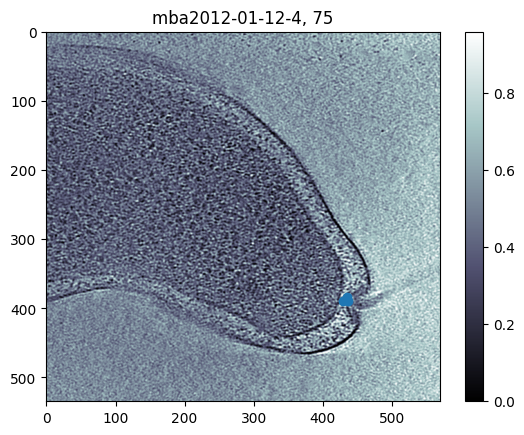

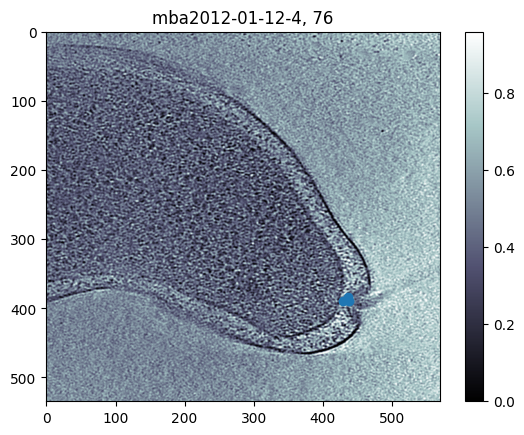

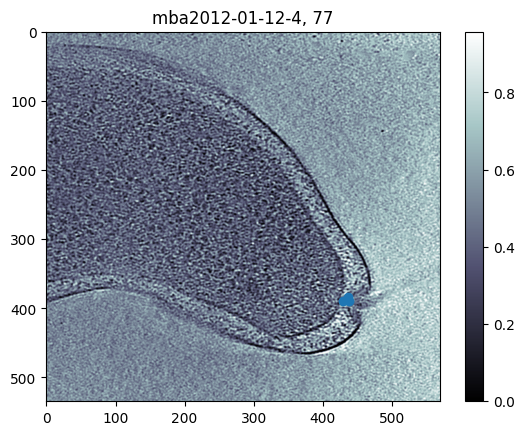

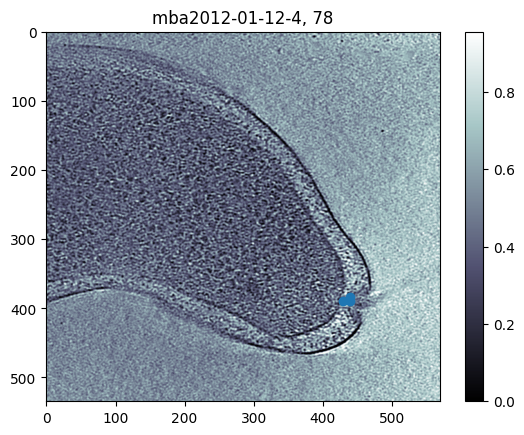

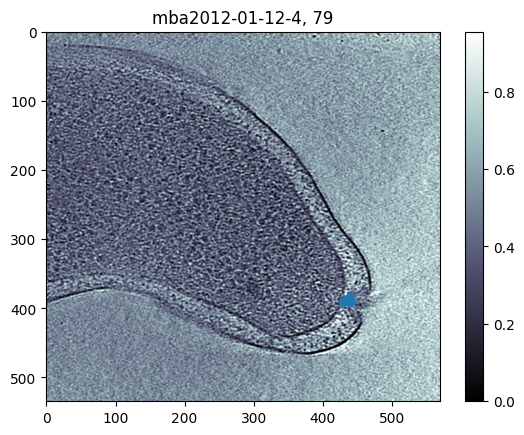

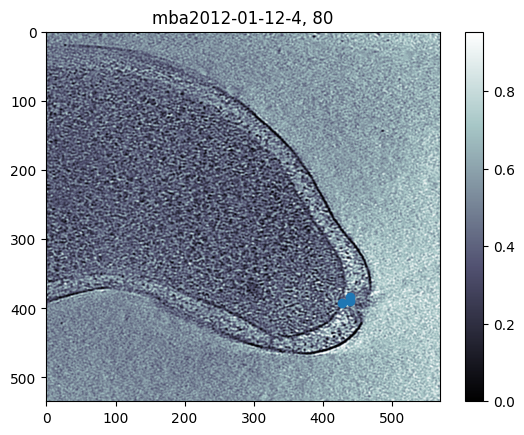

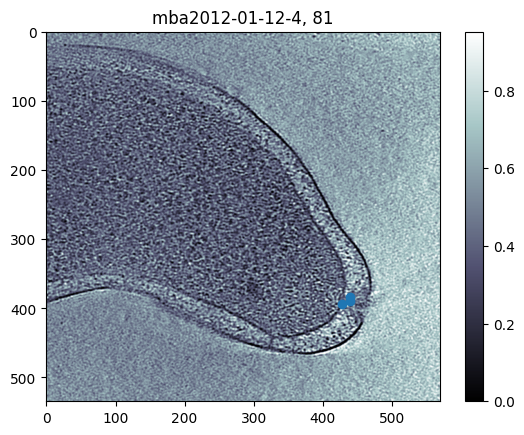

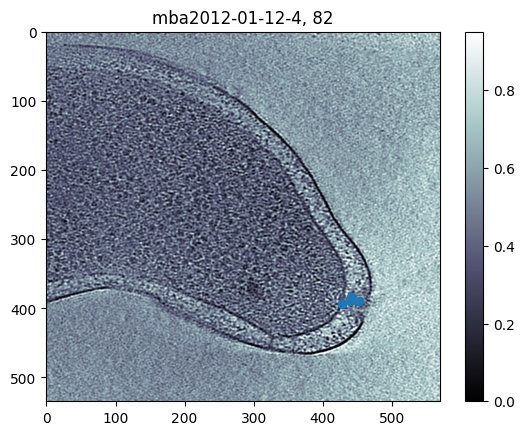

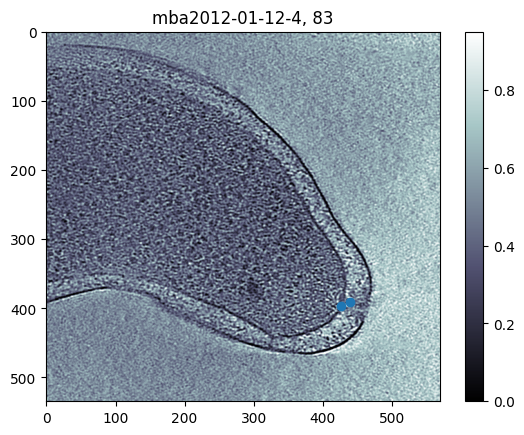

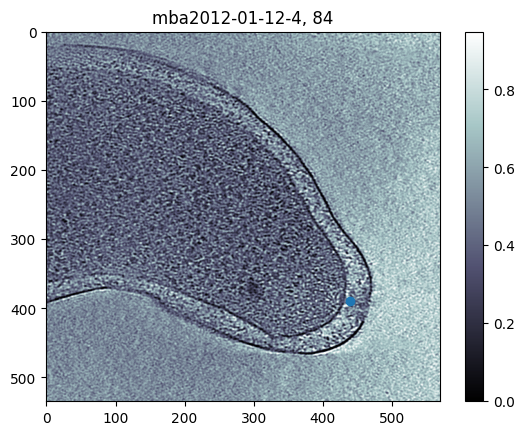

In [29]:
ind = 0
for d in data:
    if d.name == 'mba2012-01-12-4':
        break
    ind+=1
print(data[ind].name, data[ind].voxel_spacing, np.sqrt(data[ind].data_shape[1]*data[ind].data_shape[2]))
print(models[0].test_data[ind].labels)
zz=128
zz=np.round(models[0].test_data[ind].labels['z'][0]).astype(int)
visualize_slice(data[ind], list(np.arange(zz-5,zz+5)))
#visualize_slice(data[ind], [168, 79])
#mba2011-12-17-28